# Factors Influencing Salaries of Data Science Roles

[Example](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/code?datasetId=2268489&sortBy=voteCount)

## Table of Contents

- [Factors Influencing Salaries of Data Science Roles](#factors-influencing-salaries-of-data-science-roles)
  - [Table of Contents](#table-of-contents)
  - [Data Exploration](#data-exploration)
    - [Dataset Overview](#dataset-overview)
      - [Work Year](#work-year)
      - [Experience Level](#experience-level)
      - [Employment Type](#employment-type)
      - [Job Title](#job-title)
      - [Countries](#countries)
    - [Key Insights](#key-insights)
      - [Salary Distribution](#salary-distribution)
      - [Salary by Experience Level](#salary-by-experience-level)
      - [Salary by Job Titles](#salary-by-job-titles)
      - [Salary by Employees Region and Company Location](#salary-by-employees-region-and-company-location)
      - [Salary by Company Location and Company Size](#salary-by-company-location-and-company-size)
      - [Salary by Remote Ratio](#salary-by-remote-ratio)
      - [Remote Ratio by Experience Level](#remote-ratio-by-experience-level)
  - [Data Preparation and Model Training](#data-preparation-and-model-training)
    - [Feature Selection](#feature-selection)
    - [Handling Data Issues](#handling-data-issues)
      - [Employment Type Issues](#employment-type-issues)
      - [Job Titles Issues](#job-titles-issues)
    - [Model Training and Performance](#model-training-and-performance)
      - [Supervised Learning](#supervised-learning)
        - [Features Importance](#features-importance)
      - [Unsupervised Learning](#unsupervised-learning)


## Data Exploration

### Dataset Overview

The dataset contains **1500 rows** and **11 columns**.

In [177]:
import pandas as pd

salaries_data_frame = pd.read_csv("data/jobs_salaries_2023.csv")
print(salaries_data_frame.shape)

(1500, 11)


#### Work Year

Most of the job records come from recent years:  
- **2022** has the largest share with ~48% of entries.  
- **2023** follows with ~33%.  
- Earlier years (**2020–2021**) make up a much smaller portion (~20% combined).  

This shows the dataset is heavily skewed toward more recent data.

           count  percentage
work_year                   
2020          75         5.0
2021         219        14.6
2022         714        47.6
2023         492        32.8


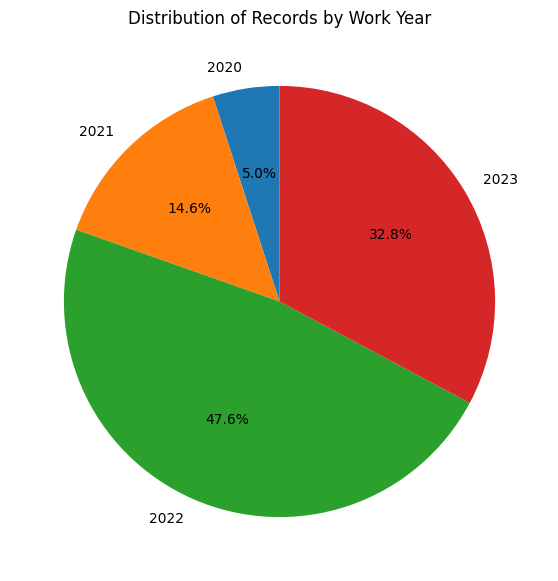

In [178]:
import matplotlib.pyplot as plt

# Count occurrences of each work_year and sort by year
work_year_counts = salaries_data_frame["work_year"].value_counts().sort_index()

# Calculate percentages
work_year_percent = (work_year_counts / work_year_counts.sum() * 100).round(2)

# Combine into one DataFrame for display
result = pd.DataFrame({"count": work_year_counts, "percentage": work_year_percent})
print(result)

# --- Pie Chart ---
plt.figure(figsize=(7, 7))
plt.pie(
    work_year_counts, 
    labels=work_year_counts.index, 
    autopct="%1.1f%%", 
    startangle=90
)
plt.title("Distribution of Records by Work Year")
plt.show()


#### Experience Level

Experience levels in the dataset are unevenly distributed:  
- **Senior (SE)** roles dominate, making up **61.5%** of all records.  
- **Mid-level (MI)** roles account for **23.6%**.  
- **Entry-level (EN)** roles represent **11.0%**.  
- **Executive (EX)** roles are rare, with only **3.9%**.  

➡️ The data is heavily skewed toward **senior positions**, with relatively few executives.

                  count  percentage
experience_level                   
EN                  167        11.1
MI                  353        23.5
SE                  922        61.5
EX                   58         3.9


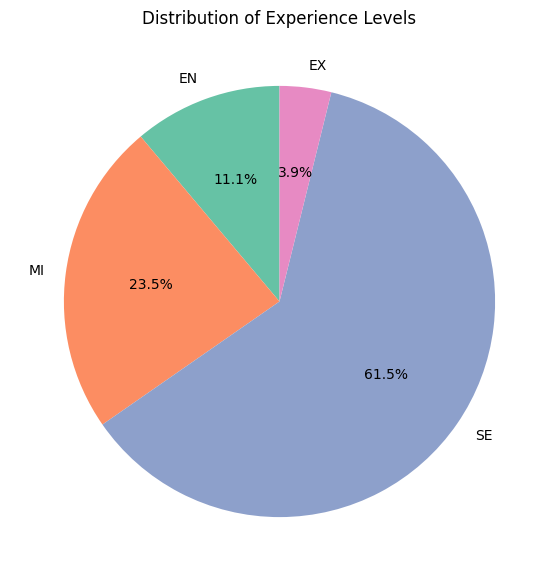

In [179]:
import matplotlib.pyplot as plt

# Define the correct order of experience levels
level_order = ["EN", "MI", "SE", "EX"]

# Convert to categorical with specified order
salaries_data_frame["experience_level"] = pd.Categorical(
    salaries_data_frame["experience_level"], categories=level_order, ordered=True
)

# Count occurrences in the specified order
experience_level_counts = salaries_data_frame["experience_level"].value_counts().sort_index()

# Calculate percentages
experience_level_percent = (
    experience_level_counts / experience_level_counts.sum() * 100
).round(1)

# Combine into a DataFrame
result = pd.DataFrame(
    {"count": experience_level_counts, "percentage": experience_level_percent}
)
print(result)

# --- Pie Chart ---
plt.figure(figsize=(7, 7))
plt.pie(
    experience_level_counts, 
    labels=experience_level_counts.index, 
    autopct="%1.1f%%", 
    startangle=90,
    colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
)
plt.title("Distribution of Experience Levels")
plt.show()


#### Employment Type

Employment type distribution:  
- **Full-time (FT)** dominates with **98.2%** of all records, showing that almost all roles are full-time.  
- **Part-time (PT)**, **Contract (CT)**, and **Freelance (FL)** together make up less than **2%** of the dataset.  

➡️ The dataset is overwhelmingly focused on **full-time employment**.

                 count  percentage
employment_type                   
FL                   6         0.4
CT                   9         0.6
PT                  12         0.8
FT                1473        98.2


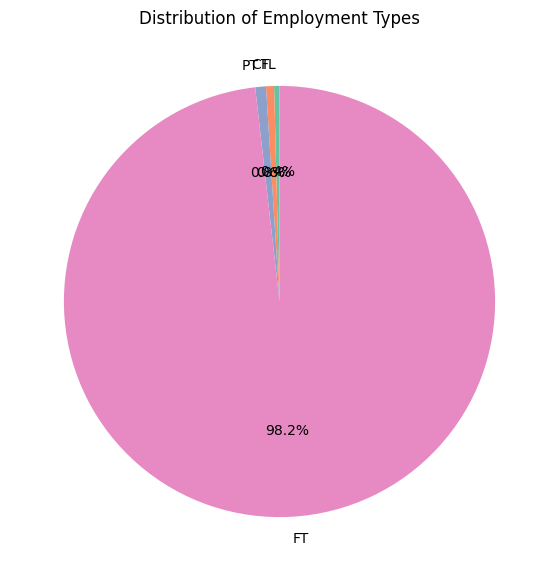

In [180]:
import matplotlib.pyplot as plt

# Define custom order
order = ["FL", "CT", "PT", "FT"]

# Count occurrences of each employment_type
employment_type_counts = salaries_data_frame["employment_type"].value_counts()

# Reorder according to the custom order
employment_type_counts = employment_type_counts.reindex(order)

# Calculate percentages
employment_type_percent = (
    employment_type_counts / employment_type_counts.sum() * 100
).round(2)

# Combine into one DataFrame
result = pd.DataFrame(
    {"count": employment_type_counts, "percentage": employment_type_percent}
)

print(result)

# --- Pie Chart ---
plt.figure(figsize=(7, 7))
plt.pie(
    employment_type_counts, 
    labels=employment_type_counts.index, 
    autopct="%1.1f%%", 
    startangle=90,
    colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
)
plt.title("Distribution of Employment Types")
plt.show()


#### Job Title

The dataset contains **69 unique job titles**.  

- The most common roles are **Data Engineer (24.4%)**, **Data Scientist (24.0%)**, and **Data Analyst (14.0%)**.  
- Together, these three account for over **60%** of all records.  
- Roles like **Machine Learning Engineer (7.1%)** are present in smaller numbers, while many niche titles appear only once.  
- When grouped, about **30.5%** of jobs fall into the "Others" category, highlighting a long tail of less frequent roles.  

➡️ The dataset is dominated by core data roles, while specialized or managerial positions are relatively rare.

In [181]:
import pandas as pd

# Count all job titles and calculate their percentages
job_counts = salaries_data_frame["job_title"].value_counts()
total_jobs = job_counts.sum()

# Create a DataFrame with count and percentage for every job title
all_job_titles = job_counts.to_frame("count")
all_job_titles["percentage"] = (all_job_titles["count"] / total_jobs * 100).round(2)

# Add accumulated count and percentage
all_job_titles["accumulated_count"] = all_job_titles["count"].cumsum()
all_job_titles["accumulated_percentage"] = (all_job_titles["accumulated_count"] / total_jobs * 100).round(2)

# Print the total number of unique job titles
print(f"Number of unique job titles: {len(all_job_titles)}")

# Print all job titles with their counts and percentages
pd.set_option('display.max_rows', None)  # Show all rows in output
print("\nAll job titles:")
print(all_job_titles)

Number of unique job titles: 69

All job titles:
                                          count  percentage  accumulated_count  accumulated_percentage
job_title                                                                                             
Data Engineer                               366       24.40                366                   24.40
Data Scientist                              360       24.00                726                   48.40
Data Analyst                                210       14.00                936                   62.40
Machine Learning Engineer                   106        7.07               1042                   69.47
Analytics Engineer                           53        3.53               1095                   73.00
Data Architect                               39        2.60               1134                   75.60
Applied Scientist                            30        2.00               1164                   77.60
Data Science Manager    

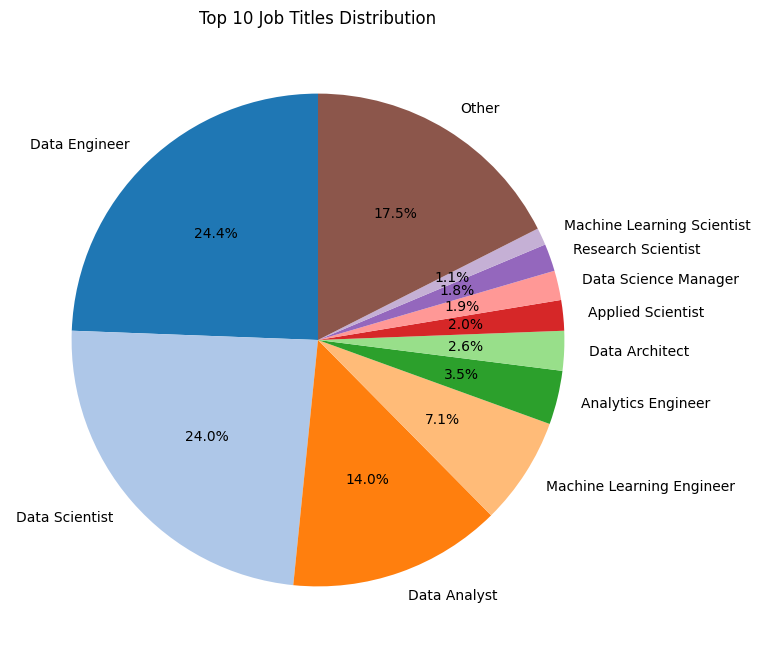

In [182]:
import matplotlib.pyplot as plt
import pandas as pd

# Count all job titles and calculate percentages
job_counts = salaries_data_frame["job_title"].value_counts()
total_jobs = job_counts.sum()

# Keep top 10 job titles and group the rest as 'Other'
top_n = 10
top_jobs = job_counts.head(top_n)
other_count = total_jobs - top_jobs.sum()

# Use pd.concat to combine top jobs and 'Other'
job_counts_for_pie = pd.concat([top_jobs, pd.Series({"Other": other_count})])

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    job_counts_for_pie, 
    labels=job_counts_for_pie.index, 
    autopct="%1.1f%%", 
    startangle=90,
    colors=plt.cm.tab20.colors  # color map for slices
)
plt.title(f"Top {top_n} Job Titles Distribution")
plt.show()


In [183]:
# Count combinations
combo_counts = salaries_data_frame.value_counts(
    subset=["job_title", "experience_level"]
).reset_index(name="count")

# Sort by count descending
combo_counts = combo_counts.sort_values(by="count", ascending=False)

# Calculate percentage
total = combo_counts["count"].sum()
combo_counts["percentage"] = (combo_counts["count"] / total * 100).round(2)

# Calculate accumulated count and percentage
combo_counts["accumulated_count"] = combo_counts["count"].cumsum()
combo_counts["accumulated_percentage"] = combo_counts["percentage"].cumsum().round(2)

# Reset index for readability
combo_counts = combo_counts.reset_index(drop=True)

print(combo_counts)


                                    job_title experience_level  count  percentage  accumulated_count  accumulated_percentage
0                              Data Scientist               SE    242       16.13                242                   16.13
1                               Data Engineer               SE    231       15.40                473                   31.53
2                                Data Analyst               SE    130        8.67                603                   40.20
3                               Data Engineer               MI     90        6.00                693                   46.20
4                              Data Scientist               MI     81        5.40                774                   51.60
5                   Machine Learning Engineer               SE     70        4.67                844                   56.27
6                                Data Analyst               MI     50        3.33                894                   59.60


#### Countries

In [184]:
import pandas as pd

# Count all company locations and calculate their percentages
location_counts = salaries_data_frame["company_location"].value_counts()
total_locations = location_counts.sum()

# Create a DataFrame with count and percentage for every company location
all_locations = location_counts.to_frame("count")
all_locations["percentage"] = (all_locations["count"] / total_locations * 100).round(2)

# Add accumulated count and percentage
all_locations["accumulated_count"] = all_locations["count"].cumsum()
all_locations["accumulated_percentage"] = (all_locations["accumulated_count"] / total_locations * 100).round(2)

# Print the total number of unique company locations
print(f"Number of unique company locations: {len(all_locations)}")

# Print all company locations with their counts and percentages
pd.set_option('display.max_rows', None)  # Show all rows in output
print("\nAll company locations:")
print(all_locations)


Number of unique company locations: 58

All company locations:
                  count  percentage  accumulated_count  accumulated_percentage
company_location                                                              
US                 1101       73.40               1101                   73.40
GB                   91        6.07               1192                   79.47
CA                   50        3.33               1242                   82.80
IN                   37        2.47               1279                   85.27
DE                   35        2.33               1314                   87.60
ES                   29        1.93               1343                   89.53
FR                   20        1.33               1363                   90.87
GR                   13        0.87               1376                   91.73
NL                   11        0.73               1387                   92.47
JP                    6        0.40               1393              

In [185]:
import pandas as pd

# Count all employee residences and calculate their percentages
residence_counts = salaries_data_frame["employee_residence"].value_counts()
total_residences = residence_counts.sum()

# Create a DataFrame with count and percentage for every employee residence
all_residences = residence_counts.to_frame("count")
all_residences["percentage"] = (all_residences["count"] / total_residences * 100).round(2)

# Add accumulated count and percentage
all_residences["accumulated_count"] = all_residences["count"].cumsum()
all_residences["accumulated_percentage"] = (all_residences["accumulated_count"] / total_residences * 100).round(2)

# Print the total number of unique employee residences
print(f"Number of unique employee residences: {len(all_residences)}")

# Print all employee residences with their counts and percentages
pd.set_option('display.max_rows', None)  # Show all rows in output
print("\nAll employee residences:")
print(all_residences)


Number of unique employee residences: 61

All employee residences:
                    count  percentage  accumulated_count  accumulated_percentage
employee_residence                                                              
US                   1074       71.60               1074                   71.60
GB                     86        5.73               1160                   77.33
CA                     48        3.20               1208                   80.53
IN                     46        3.07               1254                   83.60
ES                     31        2.07               1285                   85.67
DE                     30        2.00               1315                   87.67
FR                     24        1.60               1339                   89.27
GR                     15        1.00               1354                   90.27
NL                     12        0.80               1366                   91.07
PT                     10        0.67     

To enrich the dataset, we merged a **country-to-region mapping**.  
- Each employee’s residence country (`employee_residence`) was mapped to a broader **employee_region**.  
- Each company’s location (`company_location`) was mapped to a broader **company_region**.  

After the merge, the dataset now includes two new columns:  
- **employee_region** – the region where the employee lives  
- **company_region** – the region where the company is based  

➡️ This allows for regional-level analysis of workforce distribution and salary patterns.

In [186]:
import pandas as pd

# Load country-region mapping
country_mapping = pd.read_csv("data/countries.csv")  # the CSV you provided

# Merge mapping for employee residence
salaries_data_frame = salaries_data_frame.merge(
    country_mapping[["code", "subregion"]].rename(
        columns={"code": "employee_residence", "subregion": "employee_region"}
    ),
    on="employee_residence",
    how="left",
    validate="many_to_one"  # each employee_residence in salaries_data_frame matches at most one row in country_mapping
)

# Merge mapping for company location
salaries_data_frame = salaries_data_frame.merge(
    country_mapping[["code", "subregion"]].rename(
        columns={"code": "company_location", "subregion": "company_region"}
    ),
    on="company_location",
    how="left",
    validate="many_to_one"  # each company_location in salaries_data_frame matches at most one row in country_mapping
)

# Now salaries_data_frame has employee_region and company_region columns
print(salaries_data_frame.head())

   work_year experience_level employment_type                 job_title    salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size  employee_region   company_region
0       2023               SE              FT  Principal Data Scientist   80000.0             EUR        85847.0                 ES           100               ES            L  Southern Europe  Southern Europe
1       2023               MI              CT               ML Engineer   30000.0             USD        30000.0                 US           100               US            S    North America    North America
2       2023               MI              CT               ML Engineer   25500.0             USD        25500.0                 US           100               US            S    North America    North America
3       2023               SE              FT            Data Scientist  175000.0             USD       175000.0                 CA           100               

In [187]:
# Count and percentage by employee_region
employee_region_counts = salaries_data_frame["employee_region"].value_counts()
employee_region_percent = (employee_region_counts / employee_region_counts.sum() * 100).round(2)
employee_region_accum = employee_region_percent.cumsum().round(2)
employee_region_accum_count = employee_region_counts.cumsum()
employee_region_summary = pd.DataFrame({
    "count": employee_region_counts,
    "percentage": employee_region_percent,
    "accumulated_count": employee_region_accum_count,
    "accumulated_percentage": employee_region_accum
})
print("\nEmployee Region Summary:")
employee_region_summary


Employee Region Summary:


,count,percentage,accumulated_count,accumulated_percentage
employee_region,,,,
North America,1123,74.87,1123,74.87
Northern Europe,96,6.40,1219,81.27
Western Europe,73,4.87,1292,86.14
Southern Europe,61,4.07,1353,90.21
Southern Asia,52,3.47,1405,93.68
South America,16,1.07,1421,94.75
Central Europe,13,0.87,1434,95.62
South-Eastern Asia,10,0.67,1444,96.29
Eastern Europe,9,0.60,1453,96.89


In [188]:
# Count and percentage by company_region
company_region_counts = salaries_data_frame["company_region"].value_counts()
company_region_percent = (company_region_counts / company_region_counts.sum() * 100).round(2)
company_region_accum = company_region_percent.cumsum().round(2)
company_region_summary = pd.DataFrame({
    "count": company_region_counts,
    "percentage": company_region_percent,
    "accumulated_percentage": company_region_accum
})
print("\nCompany Region Summary:")
company_region_summary


Company Region Summary:


,count,percentage,accumulated_percentage
company_region,,,
North America,1153,76.87,76.87
Northern Europe,102,6.80,83.67
Western Europe,76,5.07,88.74
Southern Europe,51,3.40,92.14
Southern Asia,40,2.67,94.81
Central Europe,14,0.93,95.74
South America,9,0.60,96.34
Western Asia,9,0.60,96.94
Eastern Asia,8,0.53,97.47


In [189]:
# List records where employee_region is different from company_region and at least one is North America
different_region_na = salaries_data_frame[
    (salaries_data_frame["employee_region"] != salaries_data_frame["company_region"])
]

print(f"Number of records with different regions and at least one North America: {len(different_region_na)}")
print(different_region_na.shape)
print(different_region_na[[
    "job_title", "experience_level", "remote_ratio", "employee_region", "company_region", "salary_in_usd"
]])

Number of records with different regions and at least one North America: 61
(61, 13)
                               job_title experience_level  remote_ratio            employee_region      company_region  salary_in_usd
81             Machine Learning Engineer               SE           100            Southern Europe       North America       150000.0
82     Applied Machine Learning Engineer               MI           100              Southern Asia      Western Europe        69751.0
183                   Staff Data Analyst               EX             0             Western Africa       North America        15000.0
218               Applied Data Scientist               SE           100  Australia and New Zealand     Northern Europe        68318.0
249                       Data Scientist               SE           100            Southern Europe     Northern Europe        88256.0
550                         NLP Engineer               MI           100              Southern Asia       North 

#### Remote Ratio

In [190]:
# Define custom order
order = [0, 50, 100]

# Count occurrences of each remote_ratio
remote_ratio_counts = salaries_data_frame["remote_ratio"].value_counts()

# Reorder according to the custom order
remote_ratio_counts = remote_ratio_counts.reindex(order)

# Calculate percentages
remote_ratio_percent: float = (
    remote_ratio_counts / remote_ratio_counts.sum() * 100
).round(2)

# Combine into one DataFrame
result = pd.DataFrame(
    {"count": remote_ratio_counts, "percentage": remote_ratio_percent}
)

result

,count,percentage
remote_ratio,,
0,579,38.60
50,130,8.67
100,791,52.73


#### Company Size

In [191]:
# Define custom order
order = ["S", "M", "L"]

# Count occurrences of each company_size
company_size_counts = salaries_data_frame["company_size"].value_counts()

# Reorder according to the custom order
company_size_counts = company_size_counts.reindex(order)

# Calculate percentages
company_size_percent: float = (company_size_counts / company_size_counts.sum() * 100).round(2)

# Combine into one DataFrame
result = pd.DataFrame(
    {"count": company_size_counts, "percentage": company_size_percent}
)

result

,count,percentage
company_size,,
S,107,7.13
M,1073,71.53
L,320,21.33


### Key Insights

#### Salary Distribution

The salary distribution in the dataset shows a **wide range**, spanning from **$5,409** at the lowest to **$450,000** at the highest.  

- **Mean salary:** $130,934  
- **Median salary:** $130,000  
- **Skewness:** 0.59  

The closeness of the mean and median suggests that the distribution is relatively balanced, with no extreme distortion caused by outliers.  

The **skewness value of 0.59** indicates a **moderate positive skew**, meaning:  

- Salaries are more clustered toward the lower end of the scale.  
- A smaller number of very high salaries pull the average upward.  

In practical terms, most professionals earn closer to the median, but a select group commands significantly higher pay, contributing to the extended right tail of the distribution.  

Salary ranges from $5,409 to $450,000
Mean salary: $130,934
Median salary: $130,000
Skewness: 0.59


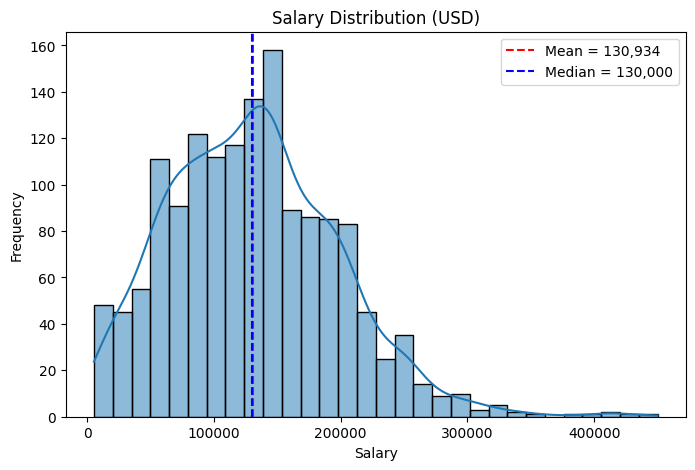

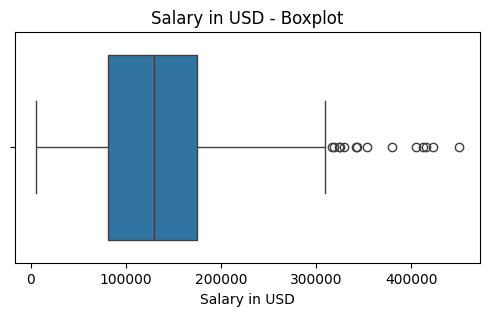

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns


salary_in_usd_series = salaries_data_frame["salary_in_usd"]


# --- 1. Descriptive statistics ---
mean_salary = salary_in_usd_series.mean()
median_salary = salary_in_usd_series.median()
min_salary = salary_in_usd_series.min()
max_salary = salary_in_usd_series.max()


print(f"Salary ranges from ${min_salary:,.0f} to ${max_salary:,.0f}")
print(f"Mean salary: ${mean_salary:,.0f}")
print(f"Median salary: ${median_salary:,.0f}")


# Skew check
skewness = salary_in_usd_series.skew()
print(f"Skewness: {skewness:.2f}")


# --- 2. Histogram ---
plt.figure(figsize=(8, 5))
sns.histplot(salary_in_usd_series, bins=30, kde=True)
plt.axvline(
    mean_salary, color="red", linestyle="--", label=f"Mean = {mean_salary:,.0f}"
)
plt.axvline(
    median_salary, color="blue", linestyle="--", label=f"Median = {median_salary:,.0f}"
)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# --- 3. Boxplot (to reveal outliers) ---
plt.figure(figsize=(6, 3))
sns.boxplot(x=salary_in_usd_series)
plt.title("Salary in USD - Boxplot")
plt.xlabel("Salary in USD")
plt.show()

#### Salary by Experience Levels

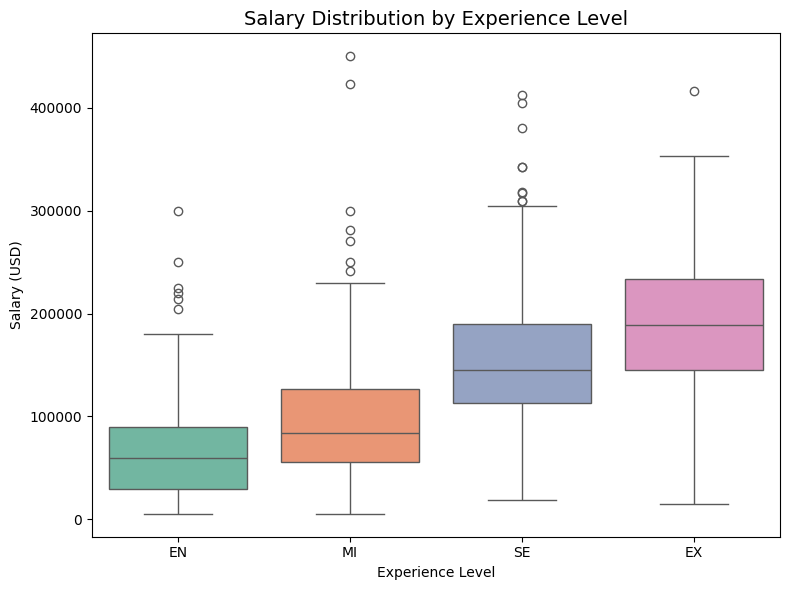

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure correct order of experience levels
experience_level_order = ["EN", "MI", "SE", "EX"]
salaries_data_frame["experience_level"] = pd.Categorical(
    salaries_data_frame["experience_level"], categories=experience_level_order, ordered=True
)

plt.figure(figsize=(8, 6))

sns.boxplot(
    data=salaries_data_frame,
    x="experience_level",
    y="salary_in_usd",
    order=experience_level_order,
    palette="Set2",
    hue="experience_level",
    legend=False,
)

plt.title("Salary Distribution by Experience Level", fontsize=14)
plt.ylabel("Salary (USD)")
plt.xlabel("Experience Level")
plt.tight_layout()
plt.show()

#### Salary by Job Titles

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_3951/3328147434.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


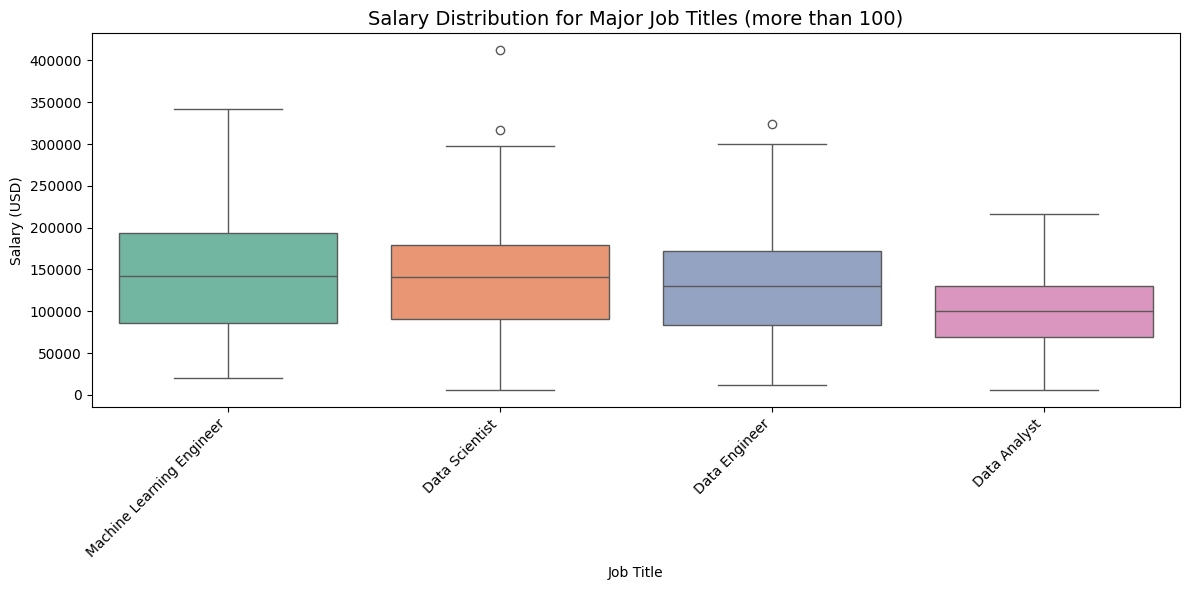

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count job titles
job_counts = salaries_data_frame["job_title"].value_counts()

# Get Major Roles
threshold = 100
major_roles = job_counts[job_counts >= threshold].index

# Filter dataframe to include only major roles
salaries_data_frame_major_roles = salaries_data_frame[salaries_data_frame["job_title"].isin(major_roles)]

# Sort job titles by median salary
job_order = (
    salaries_data_frame_major_roles.groupby("job_title")["salary_in_usd"]
    .median()
    .sort_values(ascending=False)
    .index
)

# Boxplot: Salary distribution by sorted job titles
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=salaries_data_frame_major_roles,
    x="job_title",
    y="salary_in_usd",
    palette="Set2",
    order=job_order,
)

plt.xticks(rotation=45, ha="right")
plt.title("Salary Distribution for Major Job Titles (more than 100)", fontsize=14)
plt.ylabel("Salary (USD)")
plt.xlabel("Job Title")
plt.tight_layout()
plt.show()

#### Salary by Employees Region

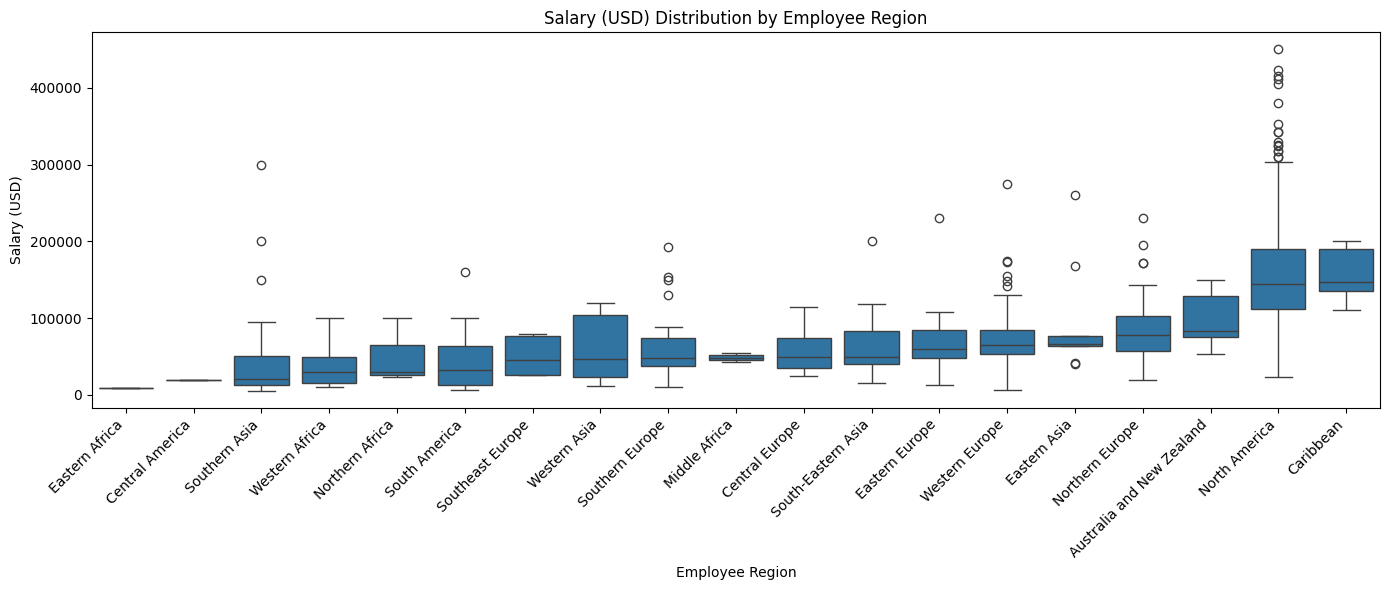

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute median salary per region for sorting
region_order = (
    salaries_data_frame.groupby("employee_region")["salary_in_usd"].median().sort_values().index
)

# Convert employee_region to categorical with the sorted order
salaries_data_frame["employee_region"] = pd.Categorical(
    salaries_data_frame["employee_region"], categories=region_order, ordered=True
)

# Draw box plot
plt.figure(figsize=(14, 6))
sns.boxplot(
    x="employee_region",
    y="salary_in_usd",
    data=salaries_data_frame,
)

# Make axis labels readable
plt.title("Salary (USD) Distribution by Employee Region")
plt.xlabel("Employee Region")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45, ha="right", fontsize=10)  # rotate and adjust alignment
plt.tight_layout()
plt.show()

#### Salary by Company Location and Company Size

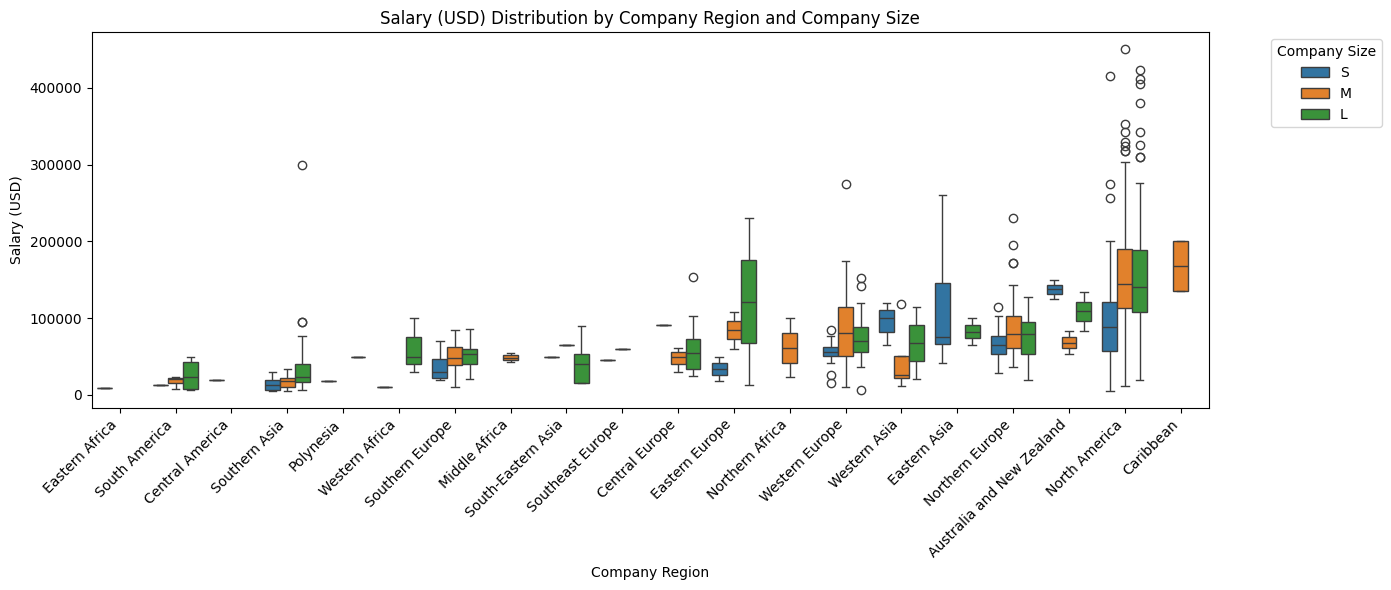

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute median salary per region for sorting 
region_order = (
    salaries_data_frame.groupby("company_region")["salary_in_usd"].median().sort_values().index
)

# Convert company_region to categorical with the sorted order 
salaries_data_frame["company_region"] = pd.Categorical(
    salaries_data_frame["company_region"], categories=region_order, ordered=True
)

# Optional: set category order for company size
size_order = ["S", "M", "L"]

# Draw box plot with region on X-axis and company size as hue 
plt.figure(figsize=(14, 6))
sns.boxplot(
    x="company_region",
    y="salary_in_usd",
    hue="company_size",
    data=salaries_data_frame,
    hue_order=size_order,
)

# Make axis labels readable
plt.title("Salary (USD) Distribution by Company Region and Company Size")
plt.xlabel("Company Region")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45, ha="right", fontsize=10)  # rotate X-axis labels
plt.legend(title="Company Size", bbox_to_anchor=(1.05, 1), loc="upper left")  # move legend outside
plt.tight_layout()
plt.show()


#### Salary by Remote Ratio

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_3951/1667619841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=salaries_data_frame, x="remote_ratio", y="salary_in_usd", palette="Set2")


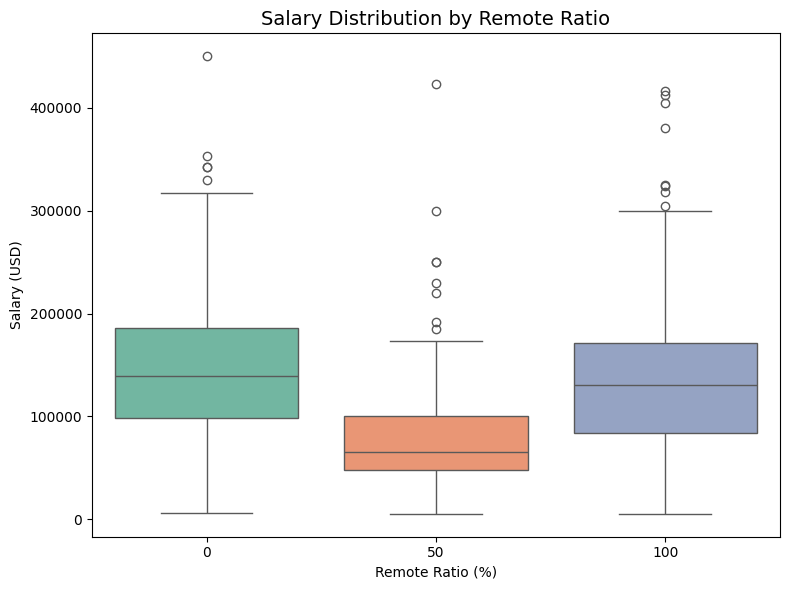

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=salaries_data_frame, x="remote_ratio", y="salary_in_usd", palette="Set2")

plt.title("Salary Distribution by Remote Ratio", fontsize=14)
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()

#### Remote Ratio by Experience Levels

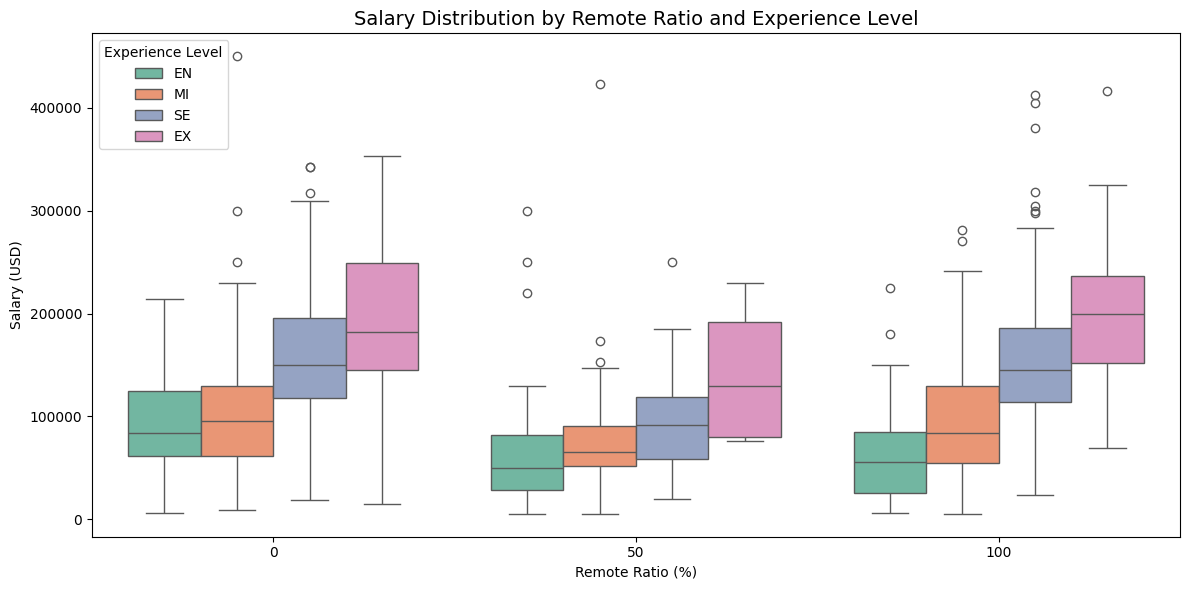

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=salaries_data_frame,
    x="remote_ratio",
    y="salary_in_usd",
    hue="experience_level",  # add experience levels
    palette="Set2",
)

plt.title("Salary Distribution by Remote Ratio and Experience Level", fontsize=14)
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary (USD)")
plt.legend(title="Experience Level")
plt.tight_layout()
plt.show()

## Data Preparation and Model Training

### Feature Selection

To analyze factors influencing salaries, the following features were chosen because they capture key dimensions of workforce experience, role, and organizational context:  

1. **experience_level**  
   - Represents the seniority of employees (e.g., entry-level, mid-level, senior, executive).  
   - Salary is strongly influenced by professional experience and career stage, making this feature critical.  

2. **job_title**  
   - Captures the specific role or specialization (e.g., Data Scientist, Engineer, Analyst).  
   - Different job functions within data-related fields command significantly different salary bands, reflecting market demand and skill requirements.  

3. **employee_residence**  
   - Indicates where the employee is located.  
   - Salaries are often adjusted for cost of living, regional demand, and local market conditions, making geographic context important.  

4. **company_location**  
   - Refers to the country where the company is based.  
   - Employers headquartered in different countries may follow distinct compensation structures, taxation systems, and labor policies, all of which impact pay.  

5. **company_size**  
   - Classifies companies as small, medium, or large.  
   - Larger firms often have more resources and standardized pay scales, while smaller companies may offer lower salaries but compensate with flexibility or benefits.  

6. **remote_ratio**  
   - Measures the degree of remote work allowed (on-site, hybrid, or fully remote).  
   - Remote work opportunities can influence salaries: some companies adjust pay for remote employees, while others maintain uniform rates regardless of location.  

Together, these features were selected because they reflect the **individual’s role and experience**, **geographic and organizational factors**, and **work arrangements** — all of which are known to shape salary outcomes.  


### Handling Data Issues

#### Missing Values Issues

In [199]:
# Drop rows with any missing values
salaries_data_frame = salaries_data_frame.dropna()
salaries_data_frame.shape

(1494, 13)

#### Employment Type Issues

In [200]:
# Keep only full-time employees
salaries_data_frame = salaries_data_frame[salaries_data_frame["employment_type"] == "FT"]  # assuming "FT" is the code for full-time
salaries_data_frame.shape

(1467, 13)

#### Job Titles Issues

In [201]:
# ===== FILTER OUT JOB TITLES WITH FEWER THAN 100 RECORDS =====
threshold = 100
job_counts = salaries_data_frame["job_title"].value_counts()
salaries_data_frame = salaries_data_frame[salaries_data_frame["job_title"].isin(job_counts[job_counts >= threshold].index)]
salaries_data_frame.shape

(1030, 13)

#### Salary Distribution after Filter

Salary ranges from $5,679 to $412,000
Mean salary: $128,589
Median salary: $129,300
Skewness: 0.43


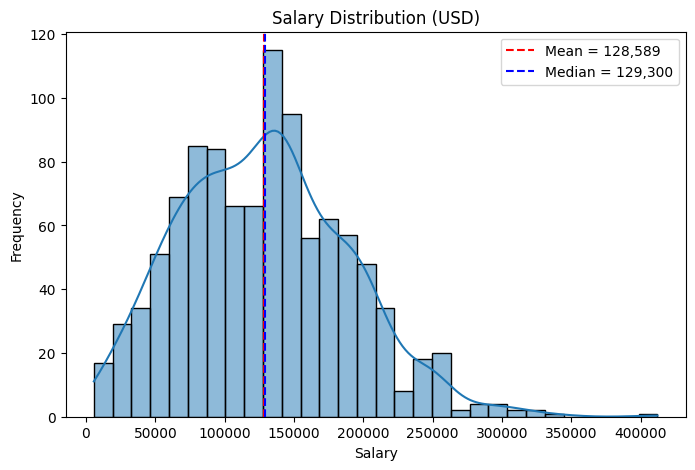

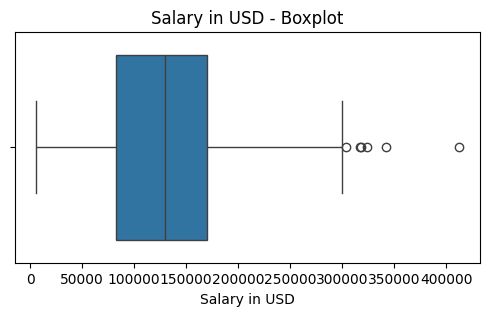


Number of outliers: 6
Outlier rows:
      work_year experience_level employment_type                  job_title    salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size employee_region company_region
358        2023               SE              FT  Machine Learning Engineer  304000.0             USD       304000.0                 US           100               US            M   North America  North America
488        2023               SE              FT             Data Scientist  317070.0             USD       317070.0                 US             0               US            M   North America  North America
145        2023               SE              FT  Machine Learning Engineer  318300.0             USD       318300.0                 US           100               US            M   North America  North America
1155       2022               EX              FT              Data Engineer  324000.0             USD       324000.0   

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Descriptive statistics ---
salary_in_usd_series = salaries_data_frame["salary_in_usd"]

mean_salary = salary_in_usd_series.mean()
median_salary = salary_in_usd_series.median()
min_salary = salary_in_usd_series.min()
max_salary = salary_in_usd_series.max()

print(f"Salary ranges from ${min_salary:,.0f} to ${max_salary:,.0f}")
print(f"Mean salary: ${mean_salary:,.0f}")
print(f"Median salary: ${median_salary:,.0f}")

# Skew check
skewness = salary_in_usd_series.skew()
print(f"Skewness: {skewness:.2f}")


# --- 2. Histogram ---
plt.figure(figsize=(8, 5))
sns.histplot(salary_in_usd_series, bins=30, kde=True)
plt.axvline(
    mean_salary, color="red", linestyle="--", label=f"Mean = {mean_salary:,.0f}"
)
plt.axvline(
    median_salary, color="blue", linestyle="--", label=f"Median = {median_salary:,.0f}"
)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# --- 3. Boxplot (to reveal outliers) ---
plt.figure(figsize=(6, 3))
sns.boxplot(x=salary_in_usd_series)
plt.title("Salary in USD - Boxplot")
plt.xlabel("Salary in USD")
plt.show()


# --- 4. Identify outliers using IQR rule ---
Q1 = salary_in_usd_series.quantile(0.25)
Q3 = salary_in_usd_series.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = salaries_data_frame[(salaries_data_frame["salary_in_usd"] < lower_bound) | (salaries_data_frame["salary_in_usd"] > upper_bound)]

print(f"\nNumber of outliers: {len(outliers)}")
print("Outlier rows:")
print(outliers.sort_values("salary_in_usd"))


# --- 5. Remove outliers ---
print(f"\nData shape before removing outliers: {salaries_data_frame.shape}")

salaries_data_frame = salaries_data_frame[
    (salaries_data_frame["salary_in_usd"] >= lower_bound) & (salaries_data_frame["salary_in_usd"] <= upper_bound)
].copy()

print(f"Data shape after removing outliers: {salaries_data_frame.shape}")

### Model Training and Performance

#### Supervised Learning

- The salary prediction model was trained using both categorical features (experience level, job title, employee residence, company location, and company size) and a numerical feature (remote ratio), with outliers removed using the IQR method and categorical variables one-hot encoded.
- A Gradient Boosting Regressor achieved an R² score of 0.602 and an RMSE of approximately $37,176, meaning the model explains about 60% of the variation in salaries but with a relatively high prediction error compared to the average salary range.
- Overall, while the model captures general salary trends and is useful for broad insights, it lacks the precision needed for individual-level salary prediction, and improvements such as adding more detailed features or refining geographic effects could enhance performance.

In [203]:
# ========================
# 1. Import libraries
# ========================
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In this analysis, the features selected for salary prediction encompass both categorical and numerical variables that capture essential aspects of workforce experience, job function, and organizational context.

The categorical features include experience level, job title, employee residence, company location, and company size. Each of these reflects factors such as career stage, specialization, geographic context, and organizational scale, all of which are known to influence compensation in data science roles.

The sole numerical feature, remote ratio, quantifies the extent of remote work permitted, which can also affect salary structures and work arrangements.

These features are combined to form the predictor matrix X, while the target variable y is defined as the employee’s annual salary in USD. This approach ensures that the model leverages a comprehensive set of attributes—spanning individual, organizational, and work arrangement dimensions—to explain and predict salary outcomes.

In [204]:
salaries_data_frame.shape

(1024, 13)

In [205]:
# ========================
# 2. Define features & target
# ========================
categorical_cols = [
    "experience_level",
    "job_title",
    "employee_region",
    "company_region",
    "company_size",
]
numeric_cols = ["remote_ratio"]
features = categorical_cols + numeric_cols

In [206]:
X = salaries_data_frame[features]
X.shape

(1024, 6)

In [207]:
y = salaries_data_frame["salary_in_usd"]
y.shape

(1024,)

To evaluate the performance of the salary prediction model, the dataset is split into training and testing subsets. This is accomplished using the train_test_split function, which randomly partitions the data so that 80% is used for training the model and 20% is reserved for testing. By setting a fixed random_state, the split remains reproducible for consistent results. The training set (X_train, y_train) is used to fit the model, while the test set (X_test, y_test) is used to assess how well the model generalizes to unseen data. This approach helps ensure that the model’s evaluation metrics reflect its ability to predict salaries for new employees, not just those it was trained on.

In [208]:
# ========================
# 3. Split dataset
# ========================
X_train, X_test, y_train, y_test = train_test_split(  # split features and target into train/test sets
    X,  # feature matrix
    y,  # target vector
    test_size=0.2,  # 20% of data for testing, 80% for training
    random_state=42  # ensures reproducible split
)

To ensure robust model performance and fair comparison across features, preprocessing is a critical step in the machine learning workflow. In this analysis, we employ a ColumnTransformer to systematically prepare both categorical and numerical variables for model training.

The categorical features—such as experience level, job title, employee residence, company location, and company size—are transformed using one-hot encoding. This technique converts each category into a binary vector, allowing the model to interpret categorical distinctions without imposing ordinal relationships. The handle_unknown="ignore" parameter ensures that any previously unseen categories in the test set do not disrupt the transformation process.

Numerical features, specifically the remote ratio, are standardized using a StandardScaler. Standardization rescales the feature to have zero mean and unit variance, which is essential for algorithms sensitive to feature magnitude and for ensuring that all features contribute equally to the model.

The preprocessing pipeline is fit on the training data and then applied to both the training and test sets. This approach prevents information leakage from the test set and guarantees that the model is evaluated on data transformed in the same manner as the training data.

In [209]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# ========================
# 4. Preprocess features
# ========================

# Create a ColumnTransformer to preprocess features:
# - "cat": OneHotEncoder for categorical columns (converts categories to binary vectors, ignores unknowns in test set)
# - "num": StandardScaler for numeric columns (scales features to zero mean and unit variance)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),  # encode categorical features
        ("num", StandardScaler(), numeric_cols),  # scale numeric features
    ]
)

# Fit the preprocessor on training data and transform it
X_train_processed = preprocessor.fit_transform(X_train)  # fit and transform training set

# Transform the test data using the same fitted preprocessor
X_test_processed = preprocessor.transform(X_test)  # transform test set

To model the relationship between employee attributes and salary, we employ the Gradient Boosting Regressor, a powerful ensemble learning algorithm that builds predictive models in a stage-wise fashion. Gradient boosting combines multiple weak learners—typically decision trees—by sequentially fitting each new tree to the residual errors of the previous ensemble. This approach enables the model to capture complex, nonlinear relationships and interactions among features.

In this implementation, the regressor is configured with 500 estimators, a learning rate of 0.05, and a maximum tree depth of 5. These hyperparameters balance model complexity and generalization, helping to prevent overfitting while ensuring sufficient capacity to learn from the data. The random_state parameter is set for reproducibility. The model is trained using the preprocessed training data, allowing it to learn patterns that explain salary variation across different roles, regions, and organizational contexts.

- The model’s predictions for four representative job roles illustrate both its strengths and weaknesses.
  - For a mid-level Data Scientist in the United States, working fully remote at a large company, the model predicted a salary of $134,718, compared to the actual salary of $125,000. This is an overestimation of about $9,718, showing relatively good accuracy for a common role in a well-represented region.
  - For an entry-level Machine Learning Engineer in India, working at a small company with a hybrid arrangement (50% remote), the model predicted a salary of $11,703, which is significantly lower than the actual $20,000. This underestimation of $8,297 suggests the model struggles with lower-salary regions and early-career roles.
  - For a senior Data Engineer in Germany, working on-site at a medium company, the model predicted $84,962, compared to the actual salary of $110,000, underestimating by $25,038. This indicates difficulty in accurately capturing the combined effects of seniority and location.
  - Finally, for a mid-level Data Analyst in the United Kingdom, working hybrid at a medium company, the predicted salary was $56,603, compared to an actual $60,000. The error here was relatively small ($3,397), showing better alignment for mid-range roles in established regions.

In [210]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

models = {
    "LinearRegression": LinearRegression(),
    
    "RandomForest": RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        min_samples_leaf=2,       # minimum number of samples required to be at a leaf node
        max_features="sqrt",      # number of features to consider when looking for the best split
        random_state=42,
        n_jobs=-1
    ),
    
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    ),
    
    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    
    "LightGBM": LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1   # disables training logs
    ),
    
    "CatBoost": CatBoostRegressor(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        random_state=42,
        verbose=0
    )
}
# Train & evaluate with true and predicted averages
results = {}
true_avg_salary = y_test.mean()  # True average salary

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    pred_avg_salary = y_pred.mean()  # Predicted average salary
    
    results[name] = {
        "RMSE": rmse,
        "R²": r2,
        "True Avg Salary": true_avg_salary,
        "Predicted Avg Salary": pred_avg_salary
    }

# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

print(results_df)
print("\nBest model based on R²:", results_df.index[0])

# Practical HR interpretation
for name, row in results_df.iterrows():
    rmse_ratio = row["RMSE"] / row["True Avg Salary"]
    if rmse_ratio <= 0.2:
        usefulness = "practically useful for HR or market-level salary estimations"
    else:
        usefulness = "may need improvement for accurate salary benchmarking"
    print(f"{name}: RMSE is {rmse_ratio:.2%} of average salary → {usefulness}")

                          RMSE        R²  True Avg Salary  Predicted Avg Salary
RandomForest      35847.739402  0.618933    123309.063415         123277.669157
LinearRegression  36157.313612  0.612323    123309.063415         120438.481176
CatBoost          37215.376315  0.589302    123309.063415         123963.982975
LightGBM          37257.100666  0.588381    123309.063415         123707.234622
XGBoost           39233.388580  0.543554    123309.063415         124539.218750
GradientBoosting  39467.571016  0.538089    123309.063415         123911.034076

Best model based on R²: RandomForest
RandomForest: RMSE is 29.07% of average salary → may need improvement for accurate salary benchmarking
LinearRegression: RMSE is 29.32% of average salary → may need improvement for accurate salary benchmarking
CatBoost: RMSE is 30.18% of average salary → may need improvement for accurate salary benchmarking
LightGBM: RMSE is 30.21% of average salary → may need improvement for accurate salary benchma

/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Linear Regression → RMSE: 36157.31, R²: 0.612


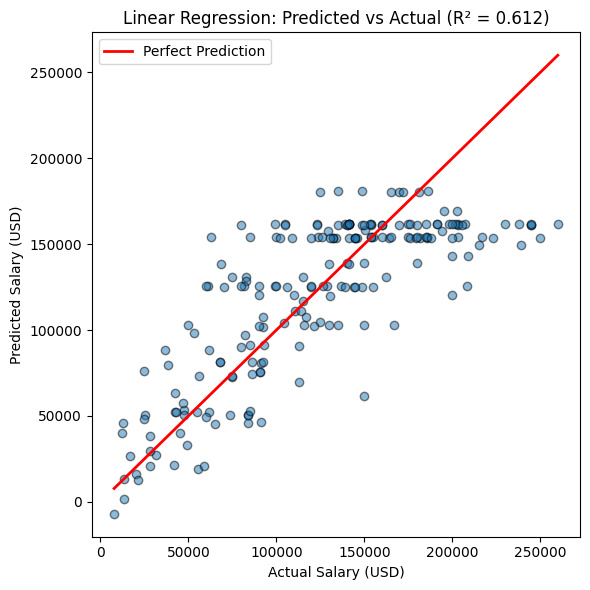

In [211]:
import matplotlib.pyplot as plt

# Fit Linear Regression only
lin_model = LinearRegression()
lin_model.fit(X_train_processed, y_train)

# Predictions
y_pred_lin = lin_model.predict(X_test_processed)

# Evaluation
rmse = root_mean_squared_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print(f"Linear Regression → RMSE: {rmse:.2f}, R²: {r2:.3f}")

# ======== Plot Predicted vs Actual ========
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, alpha=0.5, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title(f"Linear Regression: Predicted vs Actual (R² = {r2:.3f})")
plt.legend()
plt.tight_layout()
plt.show()


Random Forest → RMSE: 35847.74, R²: 0.619


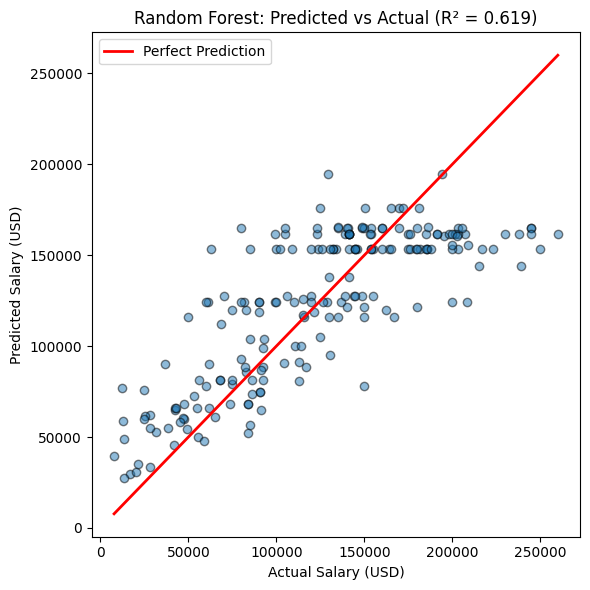

In [212]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize Random Forest
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

# Fit model
rf_model.fit(X_train_processed, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluation
rmse = root_mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest → RMSE: {rmse:.2f}, R²: {r2:.3f}")

# ======== Plot Predicted vs Actual ========
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title(f"Random Forest: Predicted vs Actual (R² = {r2:.3f})")
plt.legend()
plt.tight_layout()
plt.show()

##### Features Importance

- The aggregated feature importance values from the Gradient Boosting Regressor provide insight into which variables most strongly influence salary predictions.
- The most significant feature was employee residence (importance = 0.508), suggesting that the country of residence has the largest impact on salary levels. This aligns with real-world expectations, as geographic and economic contexts strongly affect compensation structures.
- The second most important feature was job title (importance = 0.190), reflecting how specific roles such as Data Scientist, Data Engineer, or Analyst correspond to different salary bands.
- Experience level (importance = 0.157) also contributed meaningfully, as seniority and career progression directly influence pay. In contrast, company location (importance = 0.097) played a smaller role, which may indicate that where the company is based matters less than where the employee resides—especially in the context of global or remote work.
- Finally, company size (importance = 0.028) and remote ratio (importance = 0.020) had the lowest importance values, suggesting they are weaker predictors of salary compared to role, experience, and geography.
- Overall, the model highlights that geographic context and job role are the dominant drivers of salary prediction, while company size and remote arrangements have relatively minor effects.


=== Aggregated Feature Importances (LinearRegression coefficients) ===
            feature     importance
0   employee_region  313145.178937
1    company_region  269809.527005
2  experience_level  116418.797610
3         job_title   62831.410899
4      company_size   24031.590616
5      remote_ratio     344.631690


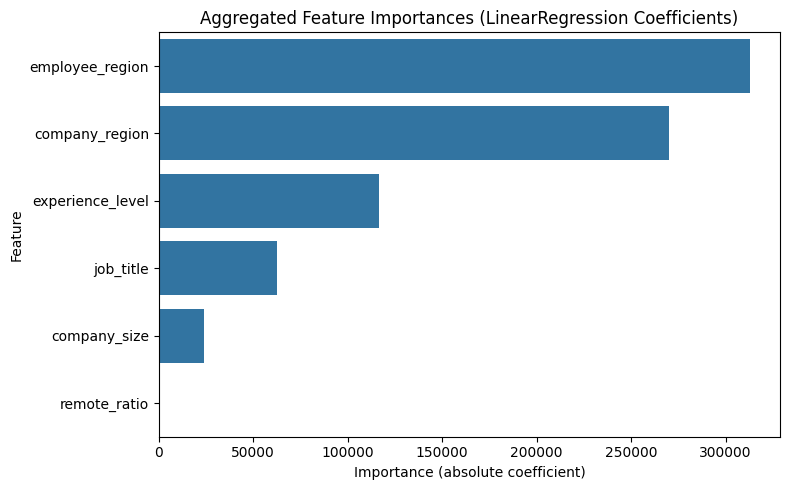

In [213]:
# ========================
# 7. Aggregate feature importances by original feature (LinearRegression)
# ========================

# Get coefficients from LinearRegression
linreg_coefs = models["LinearRegression"].coef_

# Use same OHE feature names as before
ohe = preprocessor.named_transformers_["cat"]
ohe_features = ohe.get_feature_names_out(categorical_cols)
all_features = list(ohe_features) + numeric_cols

# Map back to original columns
def map_to_original(feature_name):
    for col in categorical_cols:
        if feature_name.startswith(col + "_"):
            return col
    if feature_name in numeric_cols:
        return feature_name
    return feature_name

original_features = [map_to_original(f) for f in all_features]

# Aggregate absolute coefficients as importance
feature_importance_salaries_data_frame = (
    pd.DataFrame({"feature": original_features, "importance": abs(linreg_coefs)})
    .groupby("feature")
    .sum()
    .sort_values(by="importance", ascending=False)
    .reset_index()
)

print("\n=== Aggregated Feature Importances (LinearRegression coefficients) ===")
print(feature_importance_salaries_data_frame)

# ========================
# 8. Visualize aggregated feature importances
# ========================
plt.figure(figsize=(8, 5))
sns.barplot(x="importance", y="feature", data=feature_importance_salaries_data_frame)
plt.title("Aggregated Feature Importances (LinearRegression Coefficients)")
plt.xlabel("Importance (absolute coefficient)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



=== Aggregated Feature Importances (RandomForest) ===
            feature  importance
0  experience_level    0.282935
1    company_region    0.247193
2   employee_region    0.231470
3         job_title    0.138997
4      company_size    0.076193
5      remote_ratio    0.023213


/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_3951/3428651165.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=rf_importances, palette="viridis")


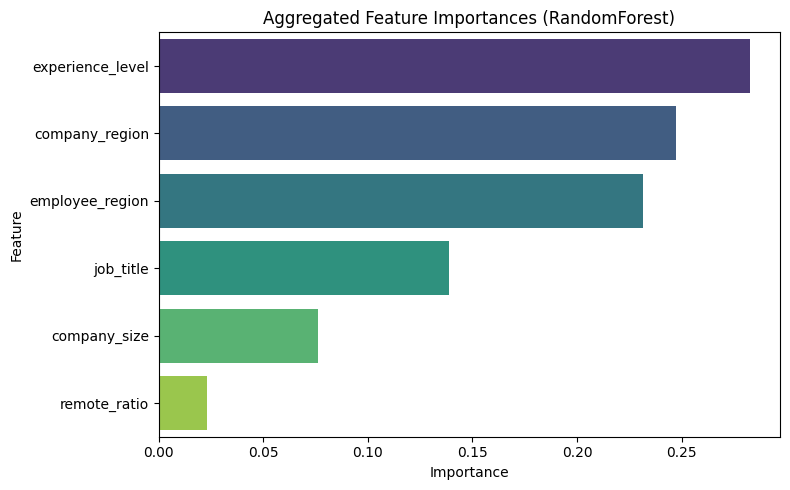

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Train RandomForest
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_processed, y_train)

# Get OHE feature names
ohe = preprocessor.named_transformers_["cat"]
ohe_features = ohe.get_feature_names_out(categorical_cols)
all_features = list(ohe_features) + numeric_cols

# Map back to original columns
def map_to_original(feature_name):
    for col in categorical_cols:
        if feature_name.startswith(col + "_"):
            return col
    if feature_name in numeric_cols:
        return feature_name
    return feature_name

original_features = [map_to_original(f) for f in all_features]

# Aggregate RandomForest feature importances
rf_importances = pd.DataFrame({
    "feature": original_features,
    "importance": rf_model.feature_importances_
}).groupby("feature").sum().sort_values(by="importance", ascending=False).reset_index()

print("\n=== Aggregated Feature Importances (RandomForest) ===")
print(rf_importances)

# Visualize aggregated feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x="importance", y="feature", data=rf_importances, palette="viridis")
plt.title("Aggregated Feature Importances (RandomForest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Unupervised Learning

- **Cluster 0 – High-paying specialists**
  - Mean salary: ~$221,000 | Median: ~$207,000  
  - Dominated by senior data scientists  
  - Low remote ratio (~16%) → suggests in-person presence is valued for leadership/strategic roles  

- **Cluster 1 – Well-paid engineers**
  - Mean salary: ~$159,000 | Median: ~$160,000  
  - Dominated by senior data engineers  
  - Moderate remote ratio (~46%) → mix of on-site and remote flexibility  
  - Strong pay despite less emphasis on being fully on-site  

- **Cluster 2 – Mid-level data scientists**
  - Mean salary: ~$59,000 | Median: ~$58,000  
  - Mostly mid-level employees  
  - High remote ratio (~68%) → remote work more common but at lower pay  
  - Lowest salary group, influenced by experience and geography  

- **Cluster 3 – Remote senior engineers**
  - Mean salary: ~$112,000 | Median: ~$113,000  
  - Dominated by senior data engineers  
  - Very high remote ratio (~78%) → proves seniority allows strong pay even in remote-heavy roles  

- **Key insights**
  - Seniority is the strongest driver of higher pay.  
  - Data scientists sit at the top of the salary spectrum.  
  - Data engineers are slightly lower but remain well-compensated.  
  - Remote-heavy roles cluster at lower pay, except for senior engineers who maintain strong earnings.  
  - Suggests a trade-off: mid-level employees may gain flexibility but earn less, while senior roles secure both compensation and remote benefits.  

In [215]:
# ========================
# 1. Import Libraries
# ========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import numpy as np

# ========================
# 3. Select Features for Clustering
# ========================
features = [
    "experience_level",
    "job_title",
    "employee_region",
    "company_region",
    "company_size",
    "remote_ratio",
    "salary_in_usd",
]

salaries_data_frame = salaries_data_frame[salaries_data_frame["employee_region"] == "North America"]
X = salaries_data_frame[features]

categorical_cols = [
    "experience_level",
    "job_title",
    "employee_region",
    "company_region",
    "company_size",
]
numeric_cols = ["remote_ratio", "salary_in_usd"]

# ========================
# 4. Preprocessing Pipeline
# ========================
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
    ]
)

# ========================
# 5. Dimensionality Reduction with TruncatedSVD
# ========================
svd = TruncatedSVD(n_components=2, random_state=42)
pipeline_svd = Pipeline(steps=[("preprocess", preprocessor), ("svd", svd)])
X_reduced = pipeline_svd.fit_transform(X)

# ========================
# 5a. Name Components Meaningfully
# ========================
feature_names = pipeline_svd.named_steps["preprocess"].get_feature_names_out()

components = svd.components_
component_names = []

for i, comp in enumerate(components):
    # take top 5 contributing features
    top_indices = np.argsort(np.abs(comp))[::-1][:5]
    top_features = feature_names[top_indices]

    # descriptive naming
    axis_keywords = {
        "salary_in_usd": "Salary",
        "remote_ratio": "Remote",
        "experience_level": "Experience",
        "job_title": "Role",
        "company_size": "Company Size",
        "employee_region": "Employee Region",
        "company_region": "Company Region",
    }

    axis_name = "Mixed Dimension"
    for key, label in axis_keywords.items():
        if any(key in f for f in top_features):
            if axis_name == "Mixed Dimension":
                axis_name = label
            else:
                axis_name += " & " + label

    component_names.append(axis_name)

print("Component Names:", component_names)

Component Names: ['Experience & Role & Company Size & Employee Region & Company Region', 'Salary & Remote & Experience & Role']


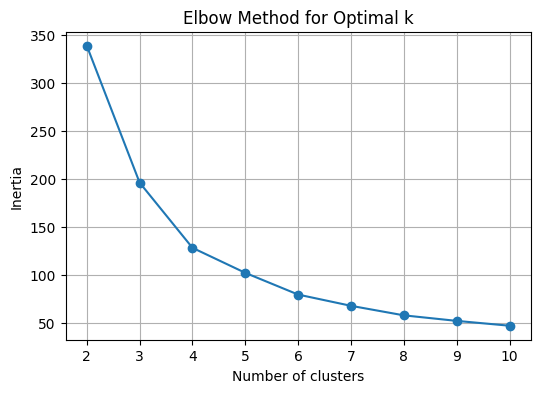

In [216]:
# ========================
# 6. Determine Optimal Clusters (Elbow Method)
# ========================
inertia_values = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_reduced)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia_values, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [217]:
# ========================
# 7. Find Optimal k with KneeLocator
# ========================
kneedle = KneeLocator(K_range, inertia_values, curve="convex", direction="decreasing")
optimal_k = kneedle.knee

print(f"Optimal number of clusters (k): {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_reduced)
salaries_data_frame["Cluster"] = clusters

Optimal number of clusters (k): 4


In [218]:
# ========================
# 8. Silhouette Score
# ========================
sil_score = silhouette_score(X_reduced, clusters, random_state=42)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.4573


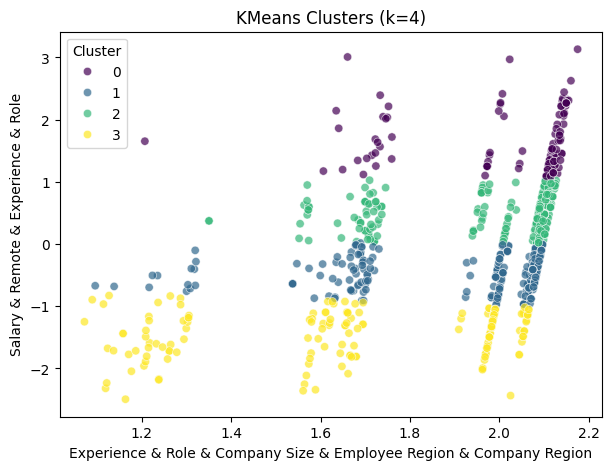

In [219]:
# ========================
# 9. Visualize Clusters
# ========================
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=X_reduced[:, 0],
    y=X_reduced[:, 1],
    hue=clusters,
    palette="viridis",
    alpha=0.7
)
plt.title(f"KMeans Clusters (k={optimal_k})")
plt.xlabel(component_names[0])
plt.ylabel(component_names[1])
plt.legend(title="Cluster")
plt.show()

In [220]:
# ========================
# 10. Cluster Insights
# ========================
cluster_summary = (
    salaries_data_frame.groupby("Cluster")
    .agg(
        salary_mean=("salary_in_usd", "mean"),
        salary_median=("salary_in_usd", "median"),
        count=("salary_in_usd", "count"),
        top_job=("job_title", lambda x: x.value_counts().index[0]),
        top_experience=("experience_level", lambda x: x.value_counts().index[0]),
        top_company_region=("company_region", lambda x: x.value_counts().index[0]),
        top_employee_region=("employee_region", lambda x: x.value_counts().index[0]),
        avg_remote_ratio=("remote_ratio", "mean"),
    )
    .reset_index()
    .sort_values(by="salary_mean", ascending=False)
    .reset_index(drop=True)
)

pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)

print("\n=== Cluster Summary (sorted by mean salary) ===")
print(cluster_summary)


=== Cluster Summary (sorted by mean salary) ===
   Cluster    salary_mean  salary_median  count         top_job top_experience top_company_region top_employee_region  avg_remote_ratio
0        0  224819.232143       221242.0    112  Data Scientist             SE      North America       North America         18.303571
1        2  168949.191406       170000.0    256  Data Scientist             SE      North America       North America         45.312500
2        1  127088.389961       130000.0    259   Data Engineer             SE      North America       North America         65.250965
3        3   85993.778443        90000.0    167    Data Analyst             SE      North America       North America         82.335329
